In [1]:
import numpy as np
import matplotlib.pyplot as plt

There are $K$ possible sources of emission. The associated values of $\mu$ are $\mu_k=k$. The prior distribution is drawn randomly.

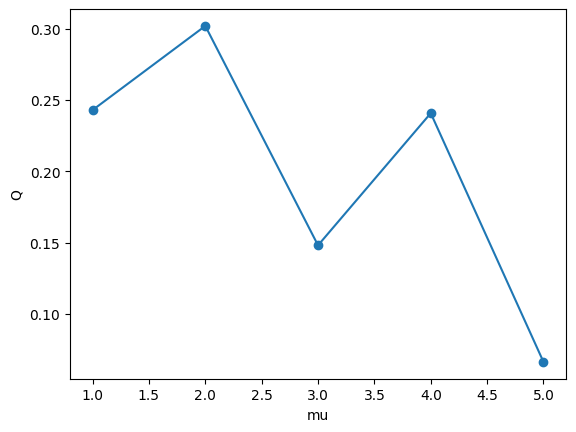

In [5]:
K = 5
mu = np.arange(1, K + 1)  # equivalent to R's 1:K
Q_aux = np.random.uniform(size=K)
Q = Q_aux / np.sum(Q_aux)

plt.plot(mu, Q, 'o-')  # 'o-' adds both points and lines
plt.xlabel('mu')
plt.ylabel('Q')
plt.show()

Complete the function `posterior(x)` for it to take a vector `x` of $n$ observations and return a vector of size $K$ which represents the posterior. The parameter $\sigma$ is fixed.

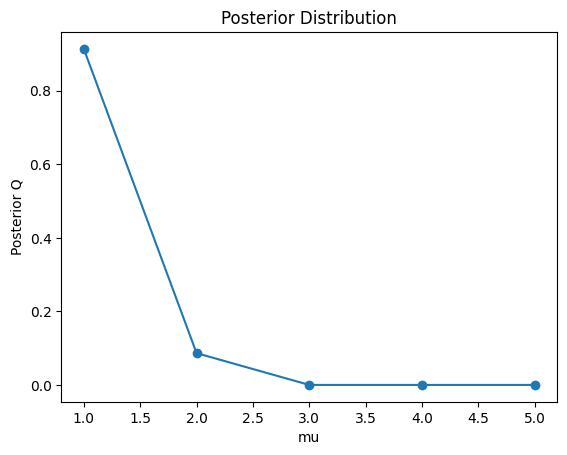

In [6]:
sigma = 1

def posterior(x):
    n = len(x)
    Q_post_aux = np.zeros(K)  # Preallocate an array for posterior values
    for k in range(K):
        Q_post_aux[k] = Q[k] * np.exp(-np.sum((x - mu[k])**2) / (2 * sigma**2))
    return Q_post_aux / np.sum(Q_post_aux)

# To test if the function works
true_mu = 1
sample_data = np.random.normal(loc=true_mu, scale=sigma, size=10)
plt.plot(mu, posterior(sample_data), 'o-')  # 'o-' adds both points and lines
plt.xlabel('mu')
plt.ylabel('Posterior Q')
plt.title('Posterior Distribution')
plt.show()

To check consistency, we superpose the prior (red points) and the posterior for various values of $n$ (black lines), when the sample is drawn with $\mu=1$.

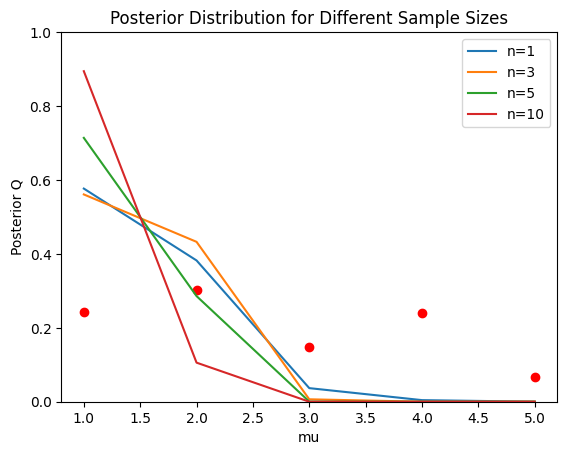

In [7]:
# Initial plot for Q
plt.plot(mu, Q, 'o', color='red')  # 'o' for points
plt.ylim(0, 1)

true_mu = 1
values_of_n = [1, 3, 5, 10]
WholeSample = np.random.normal(loc=true_mu, scale=sigma, size=max(values_of_n))  # Generate whole sample

# Loop through different sample sizes and plot the posterior
for n in values_of_n:
    plt.plot(mu, posterior(WholeSample[:n]), label=f'n={n}')  # Plot posterior for each sample size

plt.xlabel('mu')
plt.ylabel('Posterior Q')
plt.title('Posterior Distribution for Different Sample Sizes')
plt.legend()
plt.show()